In [1]:
import ROOT
from ROOT import RooFit as RF
import root_numpy as rnp
from root_pandas import read_root

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt     
import graphviz

from IPython.display import Image        ## plot png/jpeg with:  Image(filename=('./temp/my_plot.png'))
# from wand.image import Image as WImage   ## plot pdf with:       WImage(filename='hat.pdf[1]')   [1] - page number
%pylab inline       

# from sklearn.model_selection import learning_curve, GridSearchCV
# from sklearn import linear_model, metrics, tree, ensemble
# from sklearn.preprocessing import scale, StandardScaler, PolynomialFeatures
# from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split, cross_validate
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.feature_selection import SelectFromModel, RFE
# from imblearn.over_sampling import RandomOverSampler
# from sklearn.svm import SVC
# from sklearn.metrics import roc_curve, auc, classification_report, matthews_corrcoef

# import xgboost as xgb

Welcome to JupyROOT 6.14/04
Populating the interactive namespace from numpy and matplotlib


In [3]:
variables = ( [

'nB',
    
"K1_pt", "K1_eta", 
"K2_pt", "K2_eta",
    
"PI1_pt", "PI1_eta",
"PI2_pt", "PI2_eta",
    
'mu_1_pt',  'mu_1_eta',
'mu_2_pt',  'mu_2_eta', 

'JP_pt', 'JP_eta',
'phi_pt', 'phi_eta',
# 'psi_pt',   'psi_eta',
    
###  
"PIPI_mass_Cjp", "PHI_mass_Cjp", "BU_mass_Cjp", "JPSI_mass_Cmumu", 
    
### 
"JPSI_vtxprob_Cmumu", "JPSI_pvcos2_Cmumu", "JPSI_pvdistsignif2_Cmumu",
    
###    
"BU_pt_Cjp", 'BU_eta_Cjp',
    
###   
"BU_pvdistsignif2_Cjp", "BU_pvdistsignif3_Cjp", 
"BU_pvcos2_Cjp", "BU_vtxprob_Cjp",
    
###
"PV_bestBang_RF_CL"
    
] ) 

psi_vars = ['psi_mass_Cjp', 'psi_pt', 'psi_eta']
X_vars = ['X_mass_Cjp', 'X_pt', 'X_eta']
MC_vars = ["dR_mu1", "dR_mu2", "dR_pi1", "dR_pi2", "dR_K1", "dR_K2",
           "dR_mu1_vv", "dR_mu2_vv", "dR_pi1_vv", "dR_pi2_vv", "dR_K1_vv", "dR_K2_vv",
           'gen_phi_mass', 'delta_phi_mass',
           "BU_reflmass1_Cjp", "BU_reflmass2_Cjp"] 

MC = read_root('BsToPsiPhi_Smatch_v1_pair_dR_psi_renamed.root', columns = variables + MC_vars + psi_vars) # psi
# data = read_root('../../Bs_resonances/new_2_with_more_B0_e3de87.root', columns = variables + X_vars)
data = read_root('new_2_with_more_B0_nB_4000.root', columns = variables + X_vars)

In [4]:
data.head()

,X_eta,BU_pvdistsignif2_Cjp,mu_1_pt,PI2_eta,BU_pt_Cjp,K1_pt,BU_vtxprob_Cjp,mu_2_eta,phi_eta,BU_mass_Cjp,...,PHI_mass_Cjp,X_mass_Cjp,mu_1_eta,K1_eta,BU_pvcos2_Cjp,PI1_pt,PI1_eta,PV_bestBang_RF_CL,JP_eta,PIPI_mass_Cjp
0,-0.498242,14.472040,6.784686,-0.318851,16.839408,0.832825,0.120611,-0.259383,-0.507569,5.374444,...,1.009506,4.099619,-0.725867,-0.572725,0.999371,1.920597,-0.378099,0.999997,-0.519022,0.816658
1,-0.269583,62.282520,4.707489,-0.257914,34.306646,1.850064,0.866066,-0.279723,-0.367836,5.445889,...,1.024647,4.035529,-0.233070,-0.420843,0.999988,7.088191,-0.268528,0.527403,-0.271743,0.459651
2,0.921641,11.982181,7.219025,0.726417,27.948860,4.537366,0.151426,0.750872,1.044036,5.506572,...,1.044740,4.117874,1.151403,1.012913,0.999817,4.841542,0.835529,0.861919,0.960082,0.449944
3,0.970037,9.954757,7.219025,0.879466,25.793126,4.537366,0.169773,0.750872,1.043966,5.182262,...,1.044535,3.943117,1.151403,1.012913,0.999998,2.791276,1.029989,0.740230,0.960460,0.735202
4,0.945089,10.067261,7.219025,0.879466,24.085764,4.537366,0.213535,0.750872,1.044019,5.195252,...,1.044476,3.866136,1.151403,1.012913,0.999994,1.093392,0.726417,0.824596,0.960582,0.436816


In [5]:
data = data.rename(index=str, columns={"X_mass_Cjp": "psi_mass_Cjp", "X_pt": "psi_pt", "X_eta": "psi_eta"})

In [5]:
data.columns

Index(['JPSI_mass_Cmumu', 'PI1_pt', 'BU_pvdistsignif3_Cjp', 'PIPI_mass_Cjp',
       'phi_pt', 'JPSI_pvcos2_Cmumu', 'PI2_pt', 'mu_2_pt', 'mu_1_eta',
       'mu_2_eta', 'JP_pt', 'BU_eta_Cjp', 'JPSI_vtxprob_Cmumu', 'BU_pt_Cjp',
       'K2_pt', 'K1_eta', 'psi_eta', 'phi_eta', 'psi_pt', 'PI1_eta',
       'JPSI_pvdistsignif2_Cmumu', 'psi_mass_Cjp', 'BU_pvdistsignif2_Cjp',
       'PHI_mass_Cjp', 'JP_eta', 'PV_bestBang_RF_CL', 'K1_pt', 'BU_pvcos2_Cjp',
       'PI2_eta', 'BU_mass_Cjp', 'nB', 'BU_vtxprob_Cjp', 'mu_1_pt', 'K2_eta'],
      dtype='object')

In [6]:
MC.columns

Index(['JPSI_mass_Cmumu', 'dR_mu2_vv', 'PI1_pt', 'BU_pvdistsignif3_Cjp',
       'psi_mass_Cjp', 'PIPI_mass_Cjp', 'phi_pt', 'dR_pi1_vv', 'dR_K1_vv',
       'delta_phi_mass', 'JPSI_pvcos2_Cmumu', 'PI2_pt', 'mu_2_pt', 'mu_1_eta',
       'mu_2_eta', 'JP_pt', 'dR_pi1', 'BU_eta_Cjp', 'JPSI_vtxprob_Cmumu',
       'BU_pt_Cjp', 'K2_pt', 'dR_K1', 'K1_eta', 'BU_reflmass1_Cjp', 'phi_eta',
       'dR_mu1', 'PI1_eta', 'JPSI_pvdistsignif2_Cmumu', 'BU_pvdistsignif2_Cjp',
       'PHI_mass_Cjp', 'JP_eta', 'BU_reflmass2_Cjp', 'dR_pi2_vv', 'psi_pt',
       'psi_eta', 'K2_eta', 'PV_bestBang_RF_CL', 'K1_pt', 'dR_mu1_vv',
       'BU_pvcos2_Cjp', 'dR_pi2', 'PI2_eta', 'BU_mass_Cjp', 'nB',
       'BU_vtxprob_Cjp', 'dR_K2_vv', 'mu_1_pt', 'dR_K2', 'gen_phi_mass',
       'dR_mu2'],
      dtype='object')

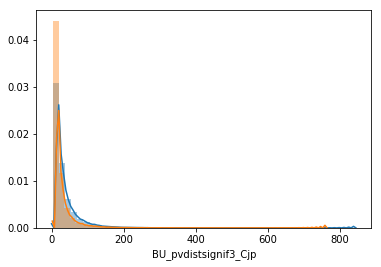

In [7]:
sns.distplot(MC.dropna().BU_pvdistsignif3_Cjp)
sns.distplot(data.dropna().BU_pvdistsignif3_Cjp)

In [6]:
data.to_pickle('data_B0_e3de87_nB_4000.pkl')
MC.to_pickle('MC_pair_dR_psi_renamed.pkl')